### Hotel Bookings Cancellations Prediction

**1) Problem Statement**

This project understands how hotel bookings cancellations are affected by factors such as whether the customer stays in weekend nights, has children, is a repeated guest, has previous cancellations etc.

**2) Data Collection**

Dataset Source: 

**2.1) Import data and required packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.pandas.set_option("display.max_columns", None)

**Import the csv data as a pandas data frame**

In [3]:
# Read the data
hotel = pd.read_csv("data\hotel_bookings.csv")

**Show top 5 records**

In [4]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Shape of the dataset**

In [5]:
hotel.shape

(119390, 32)

The dataset has 119,320 rows with 32 columns

**Dataset information**

In [6]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel["arrival_date_year"] = hotel["arrival_date_year"].astype("int")

**3.0 Data checks to perform**

    i) Check missing values

    ii) Check duplicates

    iii) Check the number of unique values of each column

    iv) Statistics of dataset

    v) Check various categories present in the categorical column

**3.1 Check Missing values**

In [8]:
features_nan = [feature for feature in hotel.columns if hotel[feature].isna().sum()>1]

for feature in features_nan:
    print("{}: {} missing values".format(feature, hotel[feature].isnull().sum()))

children: 4 missing values
country: 488 missing values
agent: 16340 missing values
company: 112593 missing values


The data has missing values in four columns: children, country, agent, and company. 
 - The company column has many missing values, while the agent column has a fewer missing values compared to company, it is dropped since agent ids themselves might not be predictive - too many unique values 

In [9]:
hotel["agent"].sample(5)

93458      9.0
31880    306.0
16905    240.0
49585      9.0
84538      9.0
Name: agent, dtype: float64

Drop the company and agent columns

In [10]:
hotel.drop(["company", "agent"], axis=1, inplace=True)

**Check duplicates**

In [11]:
hotel.duplicated().sum()

np.int64(32020)

The data contains 32,020 complete duplicates

In [12]:
# View the duplicated rows
hotel[hotel.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [13]:
# Drop the duplicates - keeping the first occurence, then reset the index
hotel = hotel.drop_duplicates()
hotel.reset_index(drop=True, inplace=True)

In [14]:
hotel.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
days_in_waiting_list               128
customer_type                        4
adr                      

Country and reservation status date have many unique categories

In [15]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87366.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000
mean,0.274934,79.900595,2016.210312,26.838549,15.815967,1.005414,2.625604,1.875873,0.138681,0.010805,0.039087,0.030422,0.184045,0.271661,0.749788,106.343157,0.084251,0.698649
std,0.446484,86.055086,0.686075,13.674188,8.835216,1.031980,2.053693,0.626521,0.455942,0.113515,0.193802,0.369200,1.732148,0.727331,10.017213,55.016143,0.281571,0.831985
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


**Insights**

- The data spans across three years: 2015, 2016, and 2017
- The average lead time is 104.01 mins, with a minimum of 0 mins and a maximum of 737 mins

**Exploring the data**

**Target Variable distribution - to check for class imbalance**

is_canceled
0    0.725066
1    0.274934
Name: proportion, dtype: float64


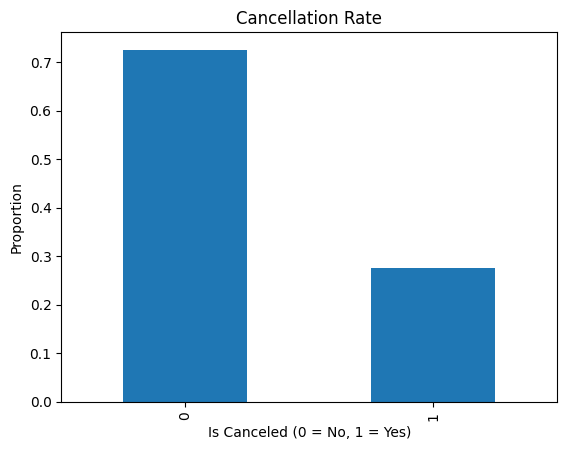

In [16]:
cancelation = hotel["is_canceled"].value_counts(normalize=True)
print(cancelation)

cancelation.plot(kind='bar', title='Cancellation Rate')
plt.xlabel('Is Canceled (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.show()

72.5 % of the people did not cancel their hotel booking while only 27.4 % canceled their bookings. The data is highly imbalanced.

**Categorical Variables Distribution - Relationship between categorical columns and the target variable**

**Unique features in each category**

In [17]:
cat_features = [feature for feature in hotel.columns if hotel[feature].dtypes == "O"]

for feature in cat_features:
    print(f"Categories in '{feature}' variable:", hotel[feature].unique(), "\n")

Categories in 'hotel' variable: ['Resort Hotel' 'City Hotel'] 

Categories in 'arrival_date_month' variable: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 

Categories in 'meal' variable: ['BB' 'FB' 'HB' 'SC' 'Undefined'] 

Categories in 'country' variable: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'Q

In [18]:
# List of categorical columns to be analyzed. I omit the 'reservation_status' and 'reservation_status_date' columns because they
# contain information about the outcome (is_canceled) and would cause data leakage if used as predictors.

categorical_cols = hotel.select_dtypes(include="object").columns.tolist()
exclude_cols = ["reservation_status", "reservation_status_date"]

categorical_cols = [col for col in categorical_cols if col not in exclude_cols]
categorical_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']


--- Analyzing 'hotel' vs. 'is_canceled' ---
is_canceled   Not Canceled  Canceled  Total  Cancellation Rate
hotel                                                         
City Hotel           37367     16047  53414           0.300427
Resort Hotel         25982      7974  33956           0.234833


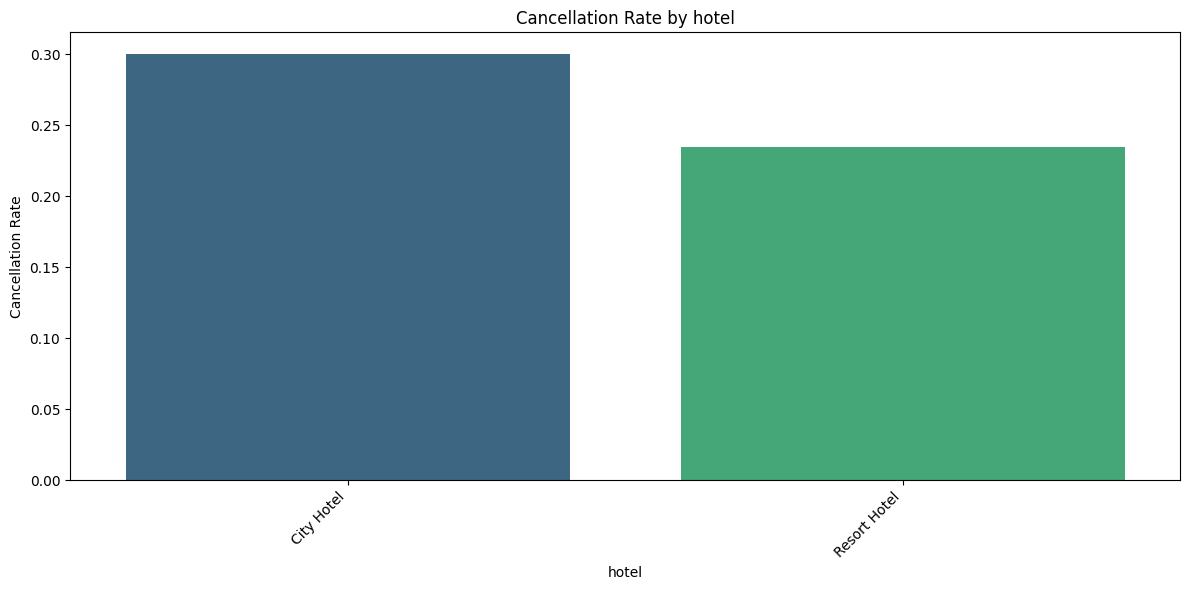

----------------------------------------

--- Analyzing 'arrival_date_month' vs. 'is_canceled' ---
is_canceled         Not Canceled  Canceled  Total  Cancellation Rate
arrival_date_month                                                  
August                      7633      3621  11254           0.321752
July                        6855      3198  10053           0.318114
April                       5497      2409   7906           0.304705
June                        5411      2353   7764           0.303065
May                         5911      2442   8353           0.292350
December                    3751      1378   5129           0.268668
September                   5046      1642   6688           0.245514
March                       5681      1830   7511           0.243643
October                     5292      1642   6934           0.236804
February                    4680      1415   6095           0.232158
January                     3653      1038   4691           0.221275
Nove

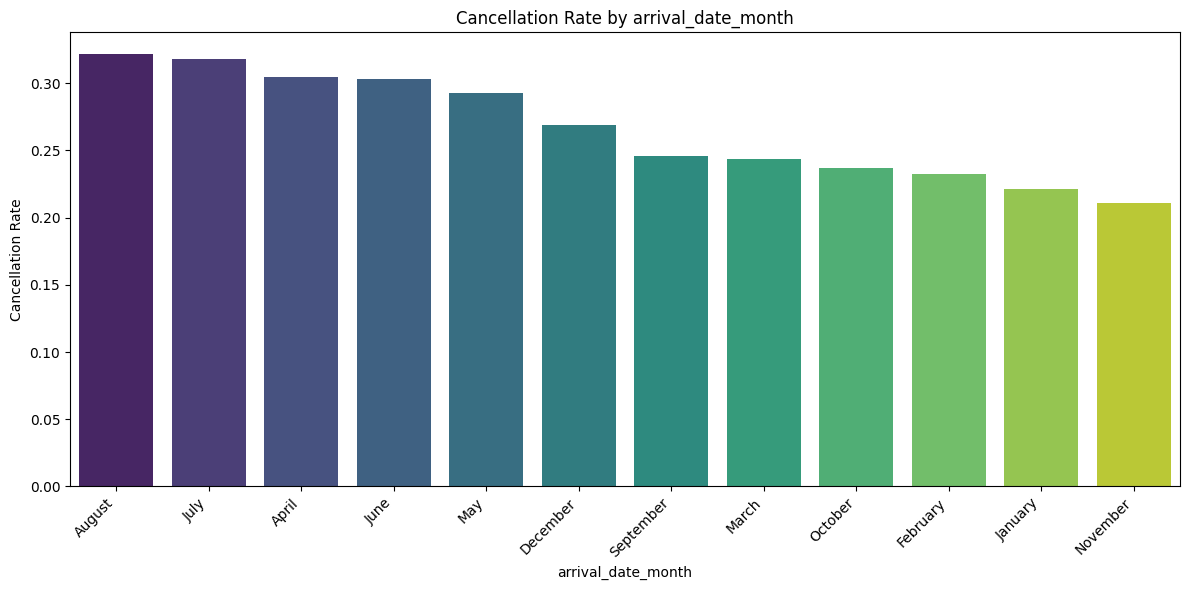

----------------------------------------

--- Analyzing 'meal' vs. 'is_canceled' ---
is_canceled  Not Canceled  Canceled  Total  Cancellation Rate
meal                                                         
SC                   6133      3347   9480           0.353059
FB                    260        99    359           0.275766
HB                   6634      2449   9083           0.269625
BB                  49912     18044  67956           0.265525
Undefined             410        82    492           0.166667


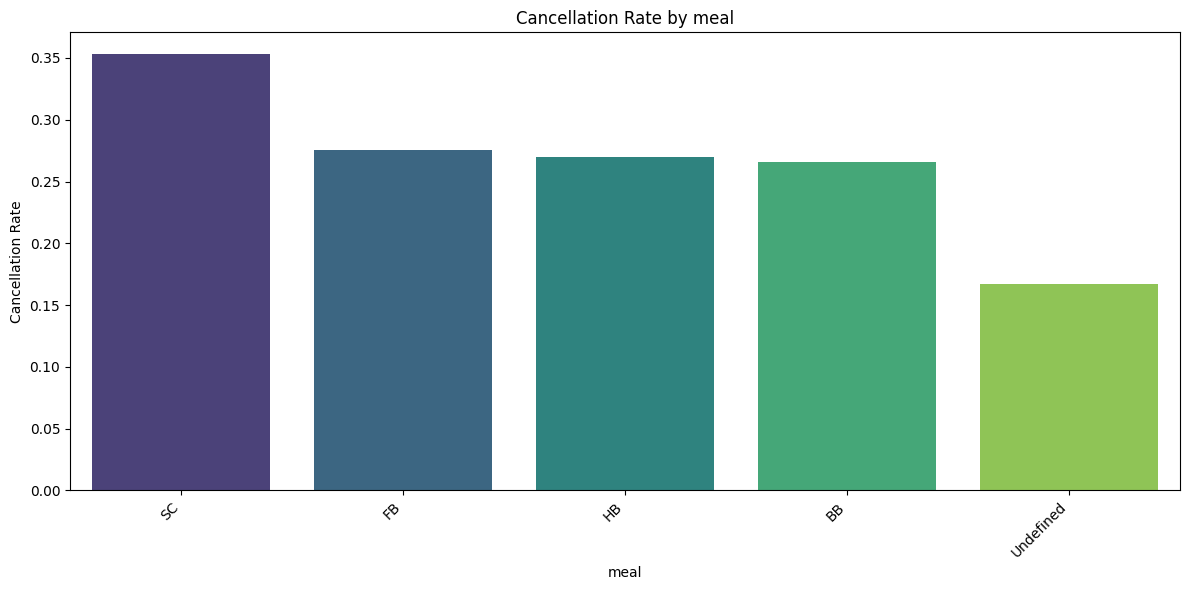

----------------------------------------

--- Analyzing 'country' vs. 'is_canceled' ---
is_canceled  Not Canceled  Canceled  Total  Cancellation Rate
country                                                      
KHM                     0         1      1                1.0
BEN                     0         3      3                1.0
GGY                     0         2      2                1.0
GLP                     0         1      1                1.0
HND                     0         1      1                1.0
...                   ...       ...    ...                ...
MMR                     1         0      1                0.0
MLI                     1         0      1                0.0
MDG                     1         0      1                0.0
LKA                     6         0      6                0.0
ABW                     2         0      2                0.0

[177 rows x 4 columns]


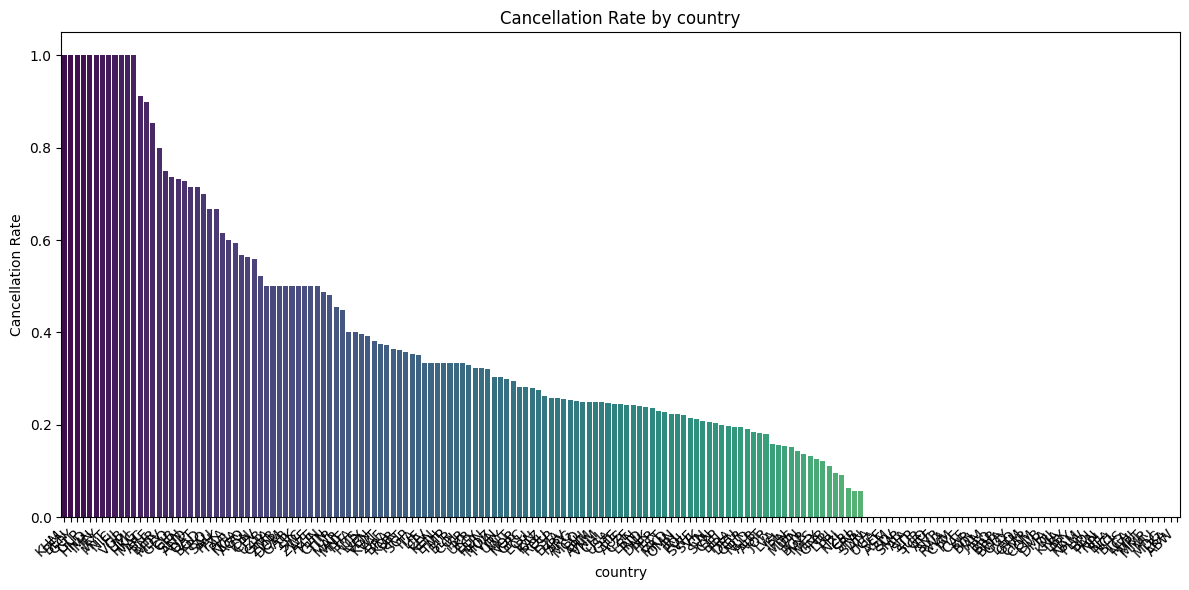

----------------------------------------

--- Analyzing 'market_segment' vs. 'is_canceled' ---
is_canceled     Not Canceled  Canceled  Total  Cancellation Rate
market_segment                                                  
Undefined                  0         2      2           1.000000
Online TA              33365     18244  51609           0.353504
Groups                  3606      1335   4941           0.270188
Aviation                 182        45    227           0.198238
Offline TA/TO          11821      2060  13881           0.148404
Direct                 10065      1737  11802           0.147178
Complementary            614        88    702           0.125356
Corporate               3696       510   4206           0.121255


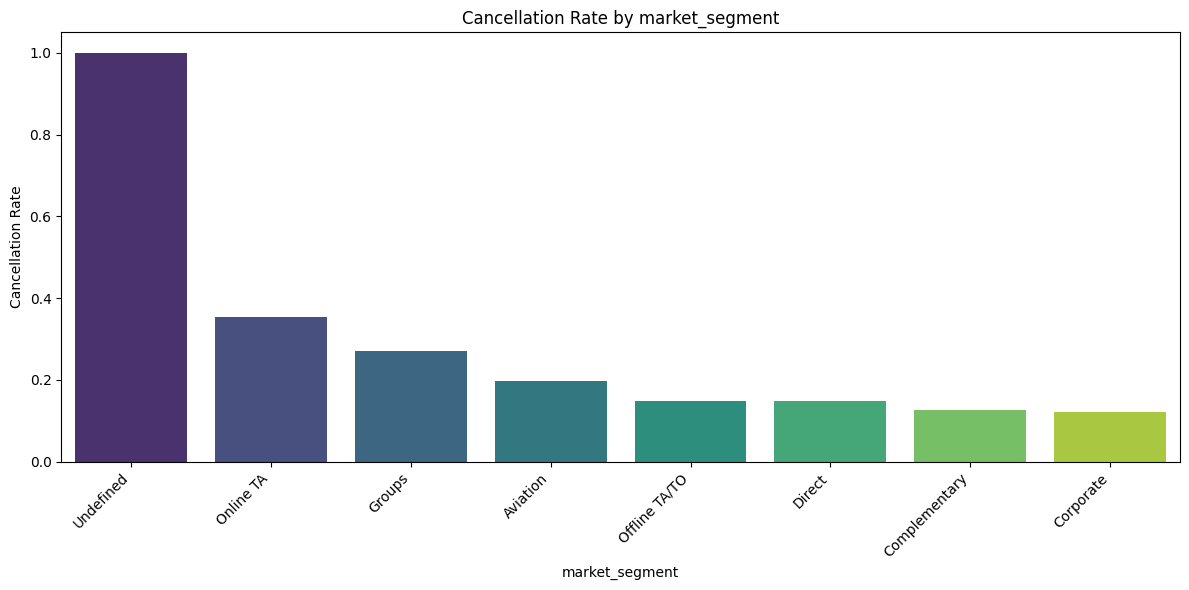

----------------------------------------

--- Analyzing 'distribution_channel' vs. 'is_canceled' ---
is_canceled           Not Canceled  Canceled  Total  Cancellation Rate
distribution_channel                                                  
Undefined                        1         4      5           0.800000
TA/TO                        47715     21408  69123           0.309709
GDS                            145        36    181           0.198895
Direct                       11061      1925  12986           0.148237
Corporate                     4427       648   5075           0.127685


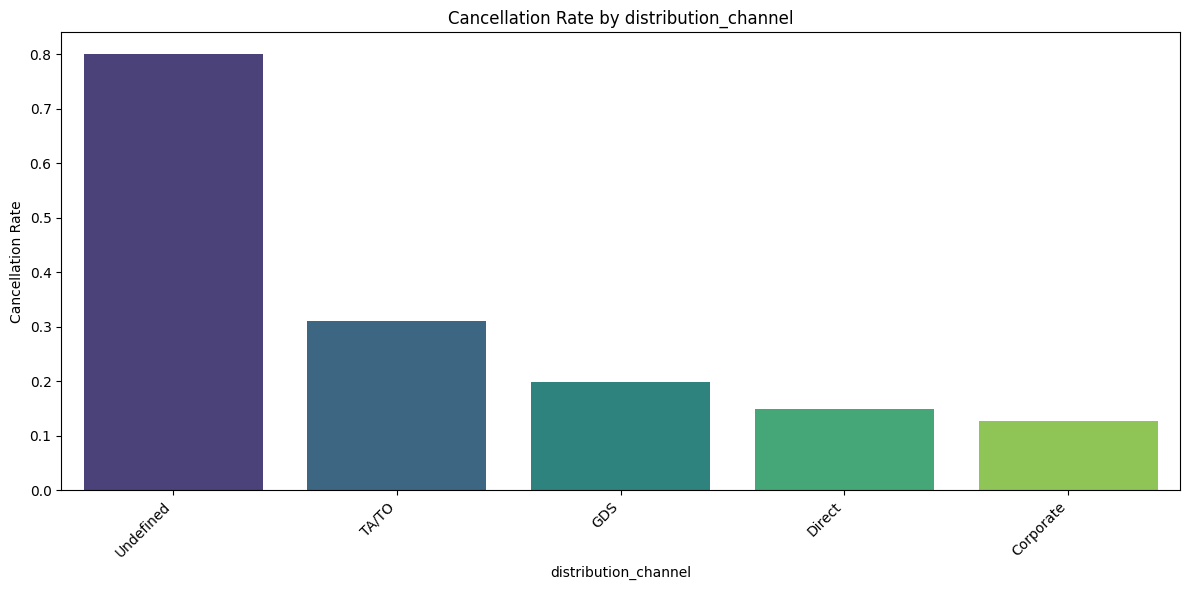

----------------------------------------

--- Analyzing 'reserved_room_type' vs. 'is_canceled' ---
is_canceled         Not Canceled  Canceled  Total  Cancellation Rate
reserved_room_type                                                  
P                              0         6      6           1.000000
H                            353       243    596           0.407718
G                           1315       737   2052           0.359162
L                              4         2      6           0.333333
C                            619       296    915           0.323497
B                            681       318    999           0.318318
F                           1972       851   2823           0.301452
D                          12162      5236  17398           0.300954
E                           4398      1648   6046           0.272577
A                          41845     14684  56529           0.259760


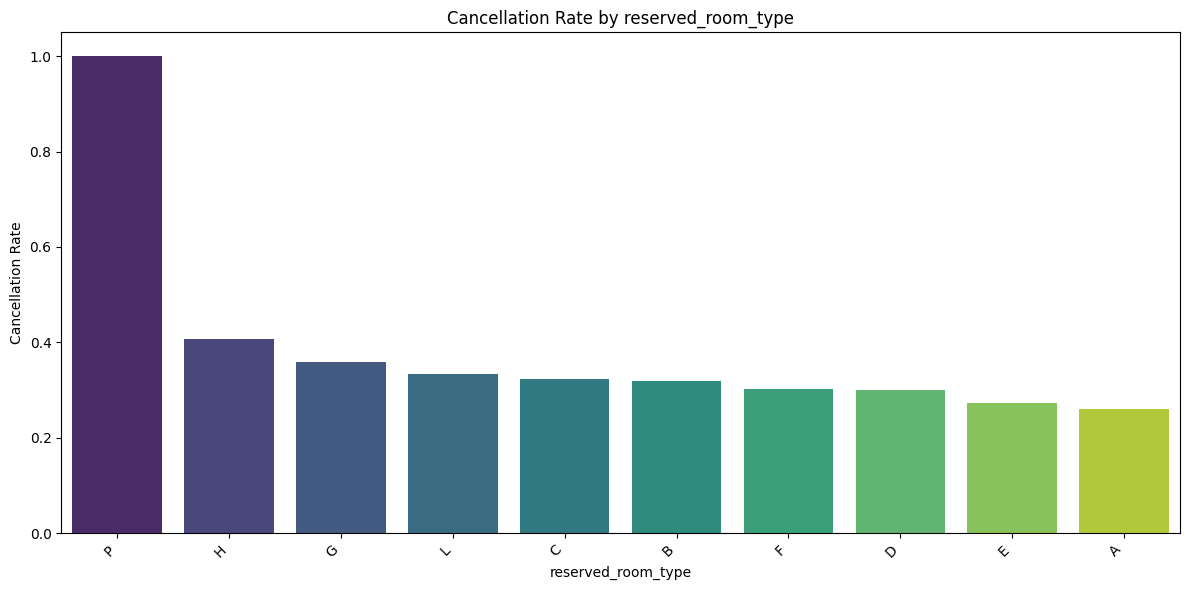

----------------------------------------

--- Analyzing 'assigned_room_type' vs. 'is_canceled' ---
is_canceled         Not Canceled  Canceled  Total  Cancellation Rate
assigned_room_type                                                  
L                              0         1      1           1.000000
P                              0         6      6           1.000000
H                            457       249    706           0.352691
A                          32114     14179  46293           0.306288
G                           1745       753   2498           0.301441
F                           2732       894   3626           0.246553
D                          16998      5431  22429           0.242142
E                           5496      1697   7193           0.235924
B                           1421       399   1820           0.219231
C                           1770       395   2165           0.182448
K                            264        12    276           0.043478
I   

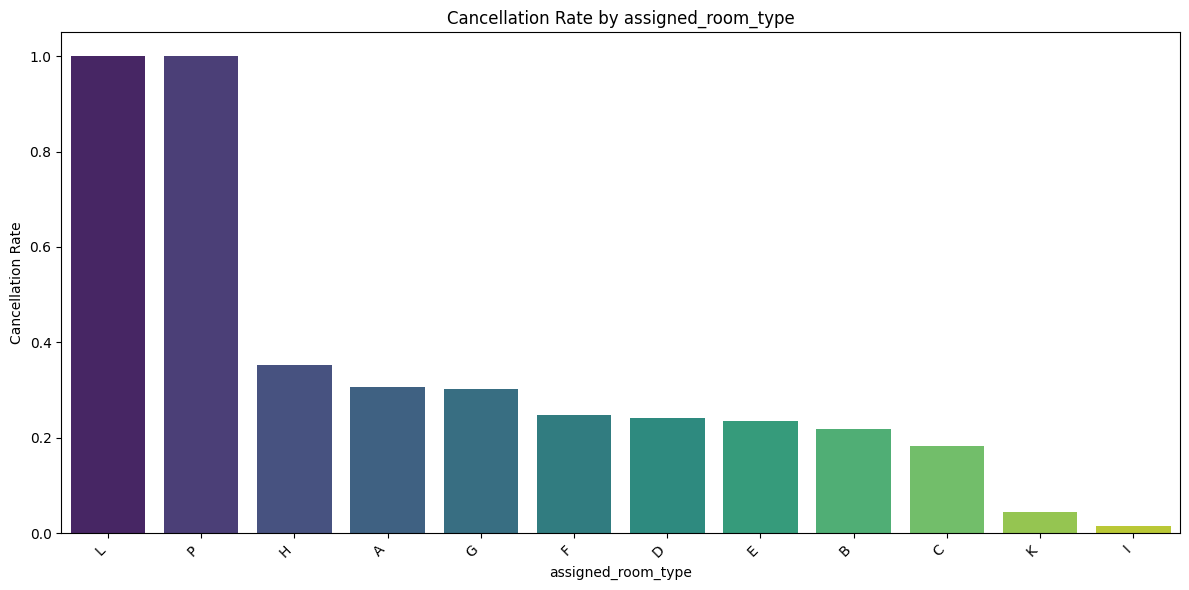

----------------------------------------

--- Analyzing 'deposit_type' vs. 'is_canceled' ---
is_canceled   Not Canceled  Canceled  Total  Cancellation Rate
deposit_type                                                  
Non Refund              55       983   1038           0.947013
No Deposit           63213     23012  86225           0.266883
Refundable              81        26    107           0.242991


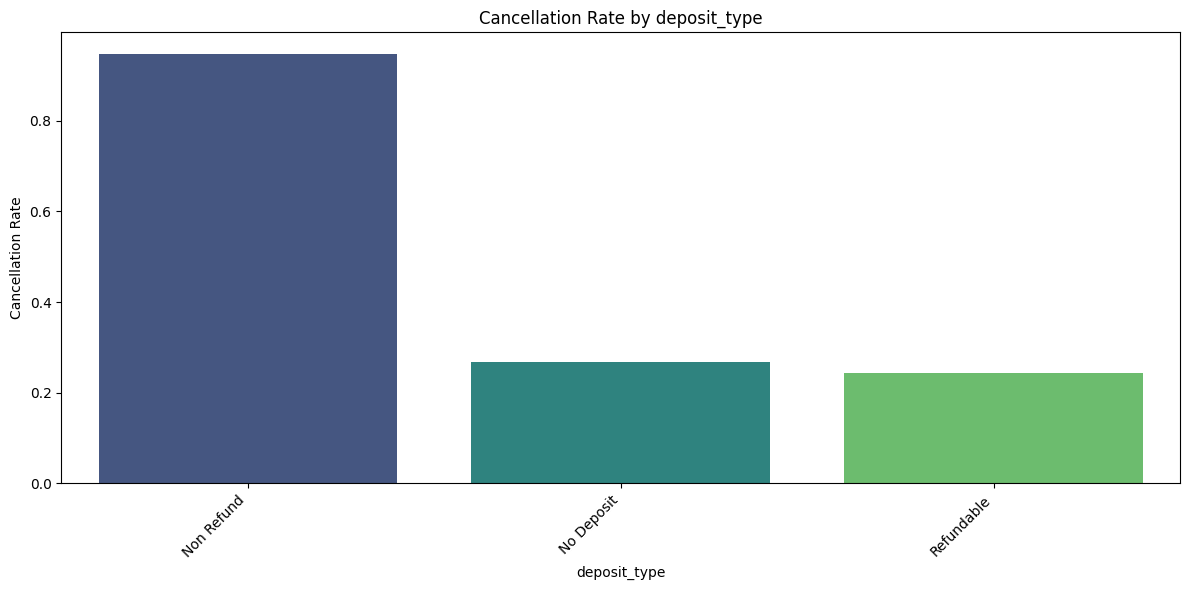

----------------------------------------

--- Analyzing 'customer_type' vs. 'is_canceled' ---
is_canceled      Not Canceled  Canceled  Total  Cancellation Rate
customer_type                                                    
Transient               50299     21668  71967           0.301082
Contract                 2627       512   3139           0.163109
Transient-Party          9933      1787  11720           0.152474
Group                     490        54    544           0.099265


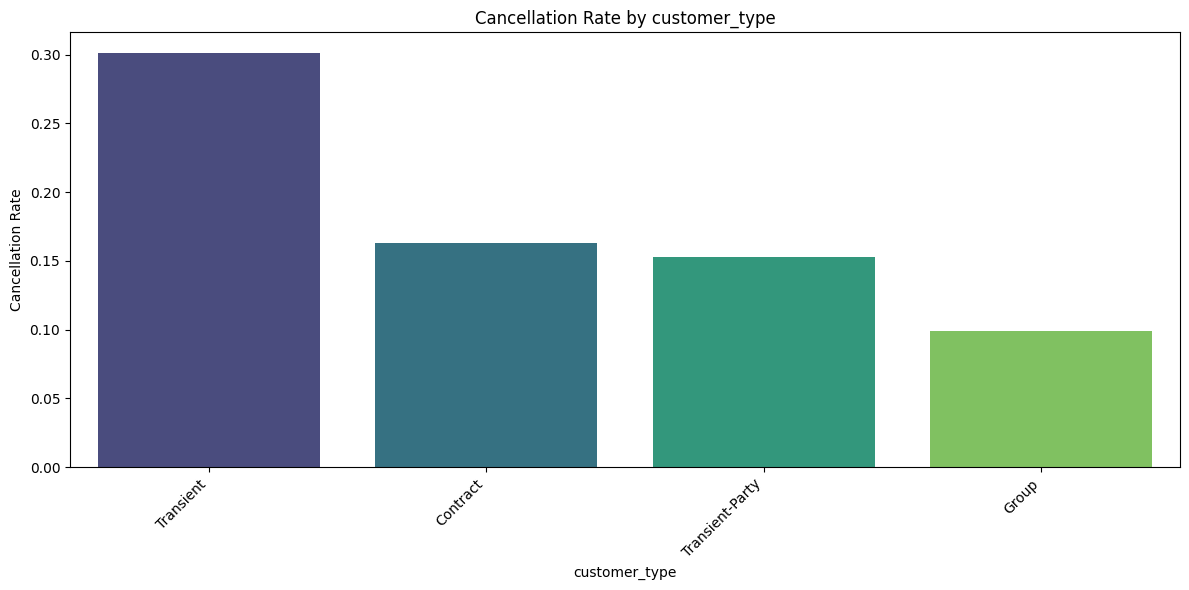

----------------------------------------


In [19]:
for col in categorical_cols:
    print(f"\n--- Analyzing '{col}' vs. 'is_canceled' ---")

    # Count of canceled and not canceled per category
    cancellation_counts = hotel.groupby([col, 'is_canceled']).size().unstack(fill_value=0)
    cancellation_counts.rename(columns={0: 'Not Canceled', 1: 'Canceled'}, inplace=True)

    # Total bookings per category
    cancellation_counts['Total'] = cancellation_counts['Not Canceled'] + cancellation_counts['Canceled']

    # Cancellation Rate per category
    cancellation_counts['Cancellation Rate'] = cancellation_counts['Canceled'] / cancellation_counts['Total']

    # Sort by cancellation rate
    cancellation_counts = cancellation_counts.sort_values(by='Cancellation Rate', ascending=False)

    print(cancellation_counts)
    
    # Bar plots of cancellation rates per category
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=cancellation_counts.index, 
        y=cancellation_counts['Cancellation Rate'].values, 
        palette='viridis'
    )
    plt.title(f'Cancellation Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Cancellation Rate')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print("-"*40)


**Insights**

- City Hotels have a significantly higher cancellation rate (approx. 30%) compared to Resort Hotels (approx. 23.5%)

- Cancellation rates show a seasonal pattern. Summer months (August, July, April, June, May) tend to have the highest cancellation rates (above 29%), while late autumn/winter months (November, January, February) have the lowest (below 24%).

- For the meal type variable, 'SC' (Self Catering) has the highest cancellation rate (35.3%), noticeably higher than the most common 'BB' (Bed & Breakfast) at around 26.5%. Undefined meal types have a low cancellation rate, but their count is relatively small.

- Cancellation rates vary widely by country. Some countries show 100% cancellation, but this is based on very few bookings (e.g., MYT, VGB, JEY, KHM, BEN with 1, 2, 8, 1, 3 total bookings respectively). This means that to get reliable insights, more focus should be placed on countries with a larger number of bookings.

- For market segment, Bookings from 'Online TA' (Online Travel Agents) have the highest cancellation rate (approx. 35.3%). 'Offline TA/TO' (Travel Agents/Tour Operators) and 'Direct' bookings have much lower rates (both around 14.8%). 'Corporate' and 'Complementary' bookings have the lowest rates (around 12-12.5%). Undefined segment has 100% cancellation but is based on only 2 bookings.

- The distribution channel, 'TA/TO' channel has the highest cancellation rate (approx. 31%). 'Direct' and 'Corporate' channels have significantly lower rates (around 14.8% and 12.8% respectively). Undefined channel shows a very high rate (80%), but based on only 5 bookings.

- Reserved room types: Room types 'P', 'H', 'G', 'L', 'C', and 'B' show higher cancellation rates (above 31.8%) compared to the most common type 'A' (approx. 26%) and types 'E', 'D', and 'F' (27-30%). Type 'P' has 100% cancellation rate based on 6 bookings.

- For the assigned room type feature, Similar to reserved type, cancellation rates vary. Types 'L' and 'P' show 100% cancellation based on tiny counts. Type 'H' has a high rate (approx. 35.3%). Importantly, room type 'K' and 'I' have very low cancellation rates (4.3% and 1.4%). 

- Bookings with a 'Non Refund' deposit have an extremely high cancellation rate (approx. 94.7%). 'No Deposit' bookings have a rate around 26.7%, and 'Refundable' deposits have the lowest rate (approx. 24.3%).

- 'Transient' customers have the highest cancellation rate (approx. 30.1%). 'Contract', 'Transient-Party', and 'Group' customers have much lower rates (16.3%, 15.2%, and 9.9% respectively).

**Numerical Features - Relationship between numerical features and the target feature**

**Select the numerical features**

In [20]:
numerical_cols = hotel.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove columns you don't want to include
exclude = ["is_canceled", "agent", "is_repeated_guest", "arrival_date_day_of_month", "arrival_date_week_number", "arrival_date_year"] 
numerical_cols = [col for col in numerical_cols if col not in exclude]

print(numerical_cols)

['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']



--- Analyzing 'lead_time' vs. 'is_canceled' ---
Unique values: 479


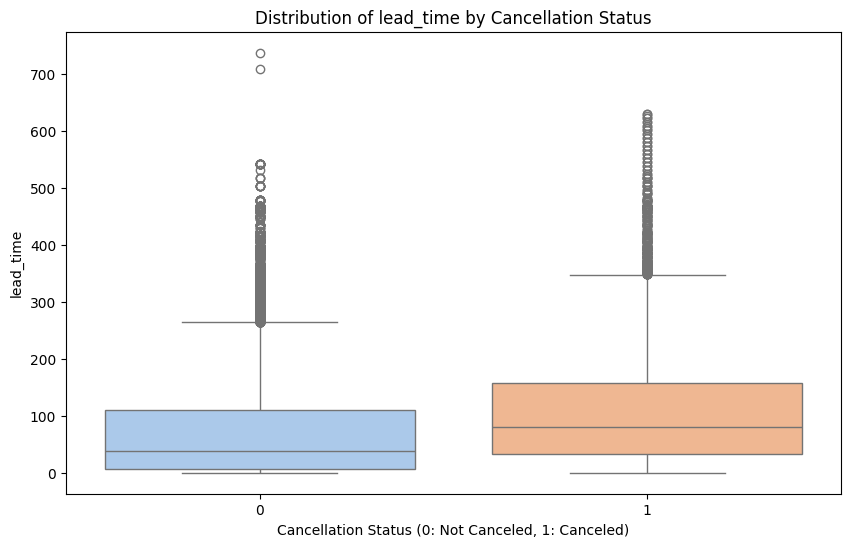

----------------------------------------

--- Analyzing 'stays_in_weekend_nights' vs. 'is_canceled' ---
Unique values: 17


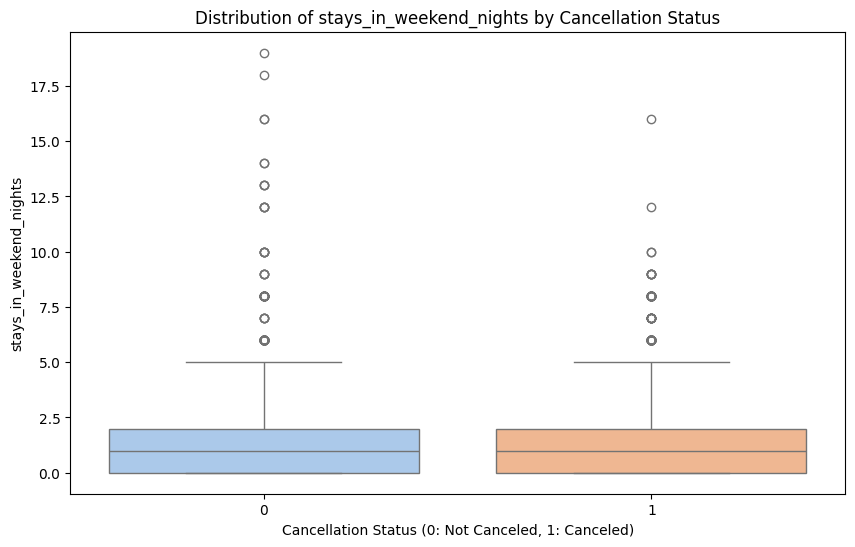

----------------------------------------

--- Analyzing 'stays_in_week_nights' vs. 'is_canceled' ---
Unique values: 35


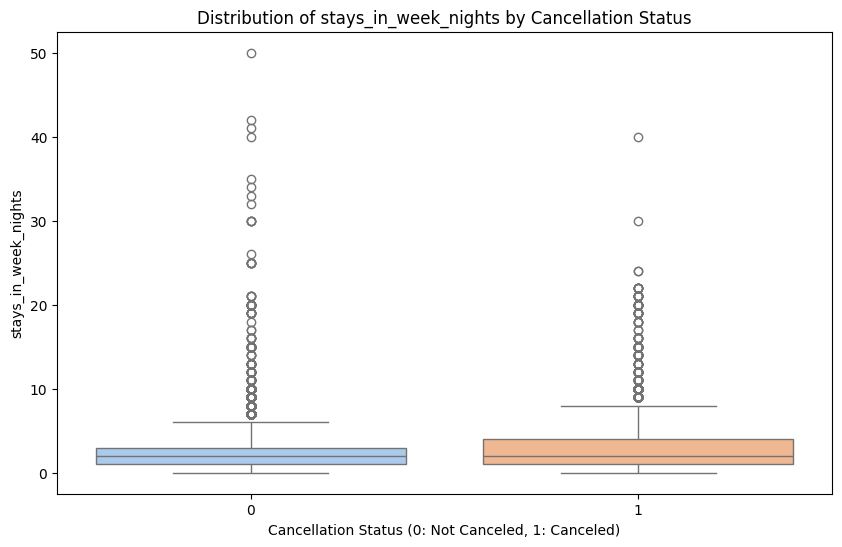

----------------------------------------

--- Analyzing 'adults' vs. 'is_canceled' ---
Unique values: 14


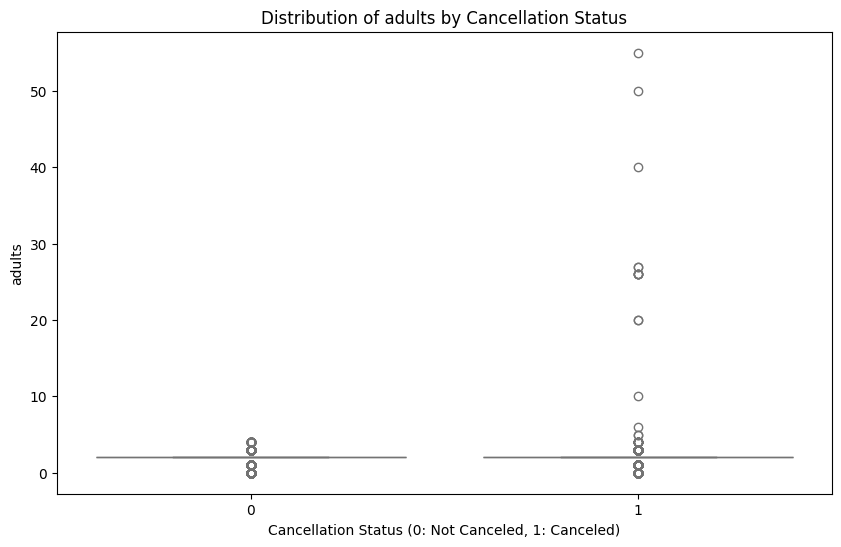

----------------------------------------

--- Analyzing 'children' vs. 'is_canceled' ---
Unique values: 6


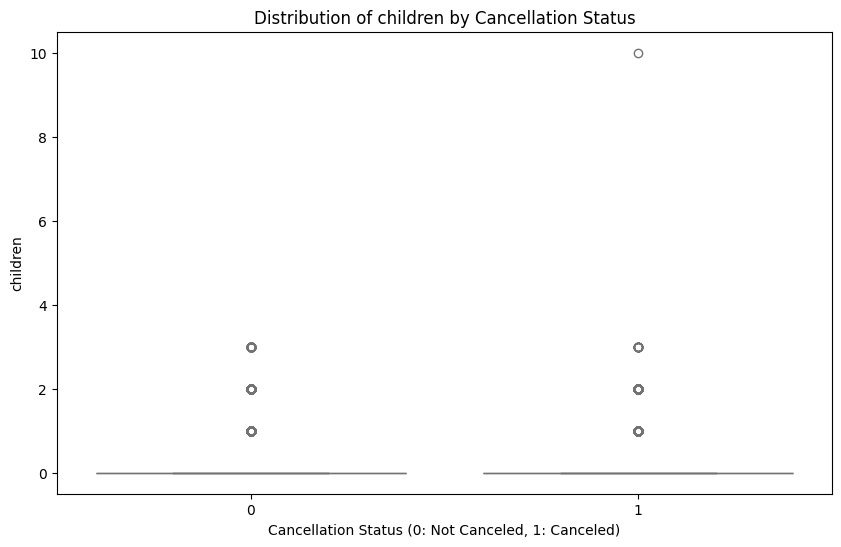

----------------------------------------

--- Analyzing 'babies' vs. 'is_canceled' ---
Unique values: 5


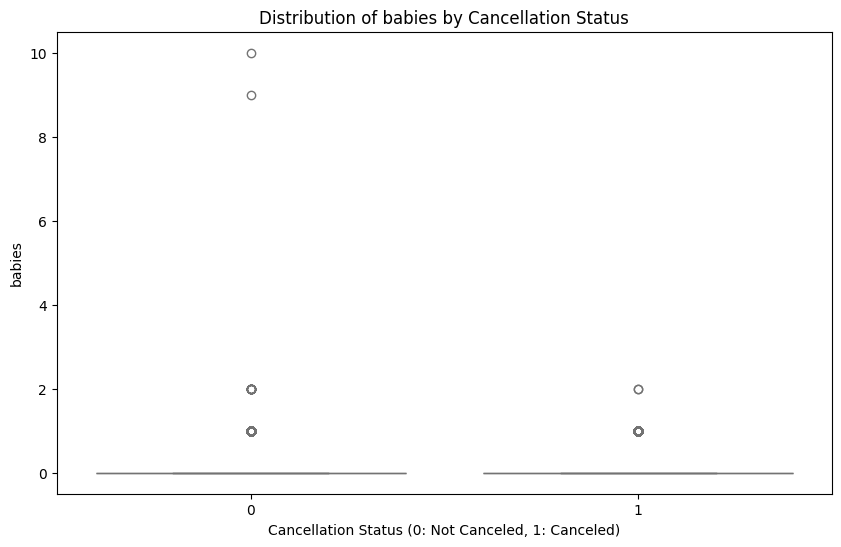

----------------------------------------

--- Analyzing 'previous_cancellations' vs. 'is_canceled' ---
Unique values: 15


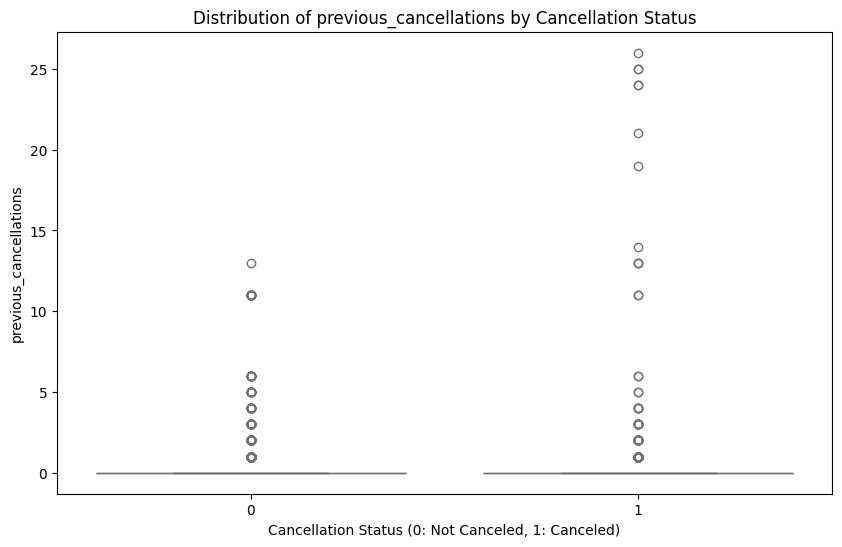

----------------------------------------

--- Analyzing 'previous_bookings_not_canceled' vs. 'is_canceled' ---
Unique values: 73


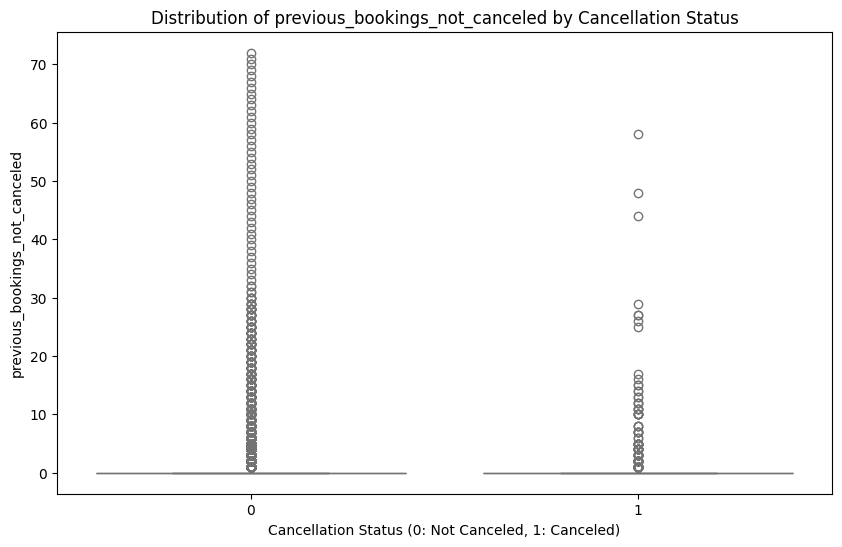

----------------------------------------

--- Analyzing 'booking_changes' vs. 'is_canceled' ---
Unique values: 21


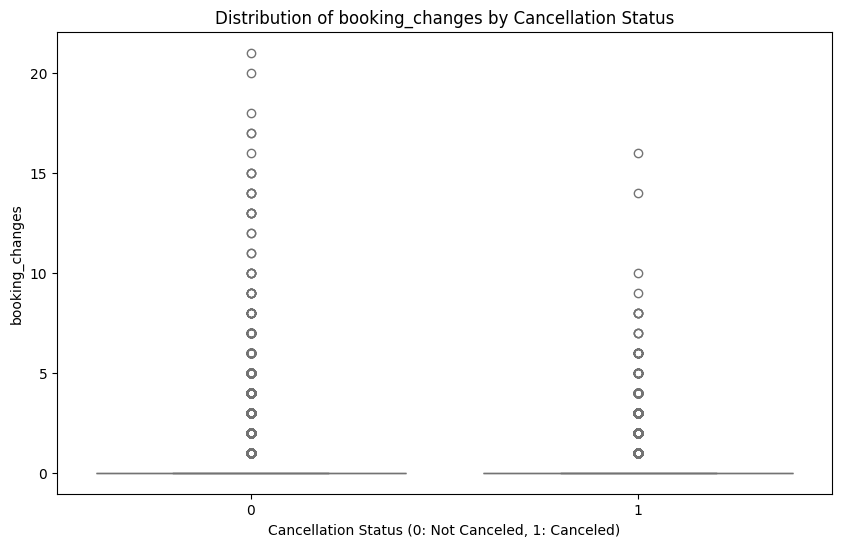

----------------------------------------

--- Analyzing 'days_in_waiting_list' vs. 'is_canceled' ---
Unique values: 128


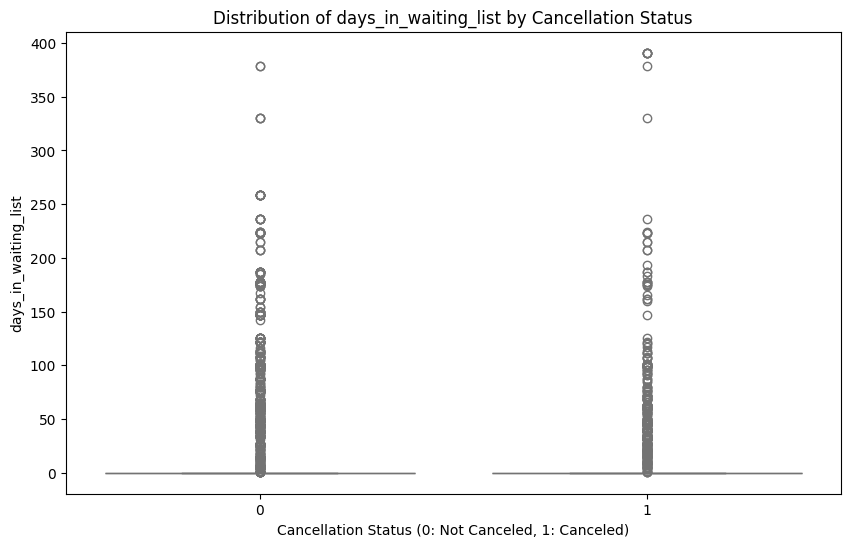

----------------------------------------

--- Analyzing 'adr' vs. 'is_canceled' ---
Unique values: 8879


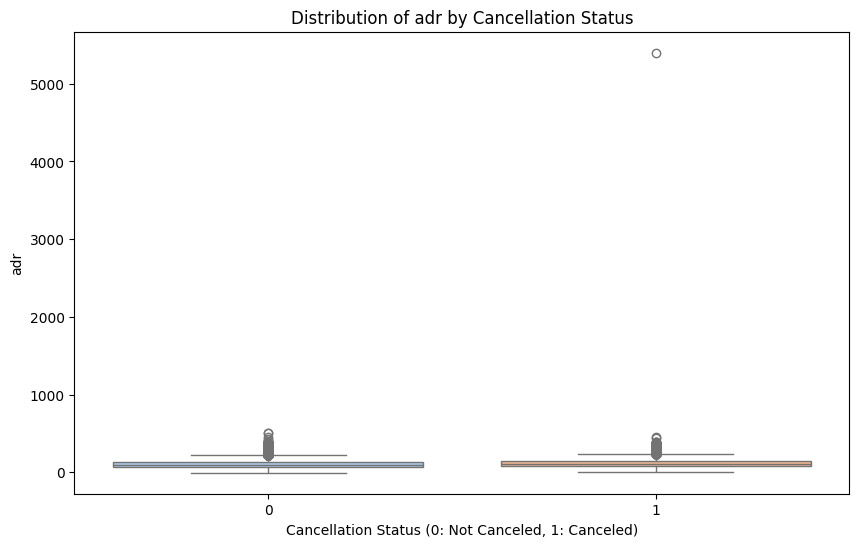

----------------------------------------

--- Analyzing 'required_car_parking_spaces' vs. 'is_canceled' ---
Unique values: 5


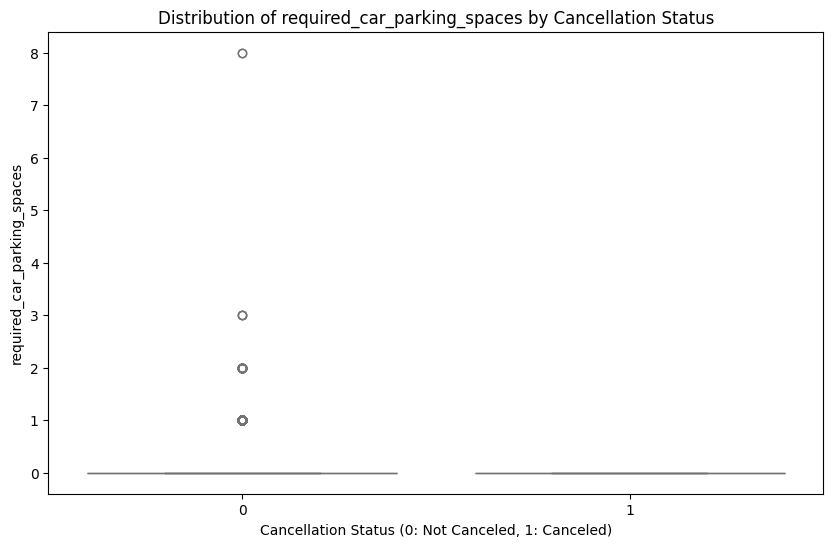

----------------------------------------

--- Analyzing 'total_of_special_requests' vs. 'is_canceled' ---
Unique values: 6


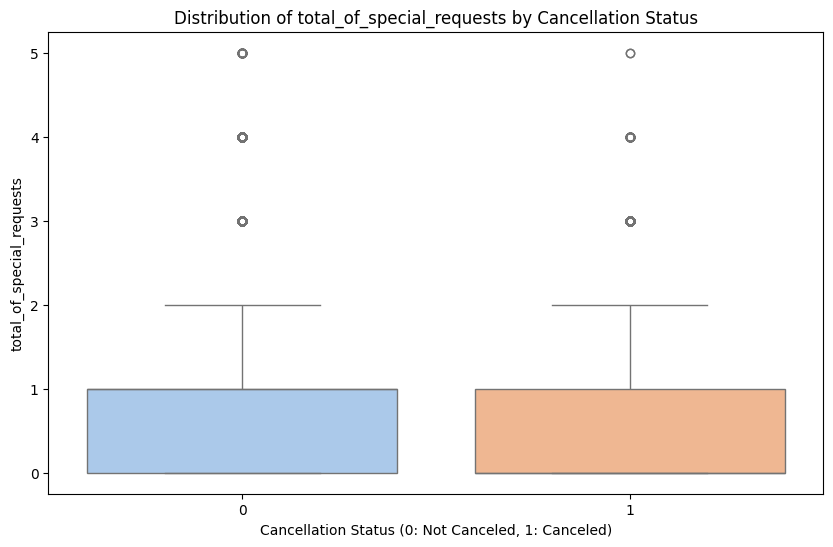

----------------------------------------


In [21]:
#hotel'children'].fillna(0, inplace=True)

for col in numerical_cols:
    print(f"\n--- Analyzing '{col}' vs. 'is_canceled' ---")
    
    print("Unique values:", len(hotel[col].unique()))

    # Distribution Comparison using Box Plots
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_canceled', y=col, data=hotel, palette='pastel')
    plt.title(f'Distribution of {col} by Cancellation Status')
    plt.xlabel('Cancellation Status (0: Not Canceled, 1: Canceled)')
    plt.ylabel(col)
    plt.show()

    print("-" * 40)


In [152]:
# The adr column has one record which appears to be badly influencing the distribution

hotel[hotel["adr"]>=5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
38737,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,0,Transient,5400.0,0,0,Canceled,2016-02-19


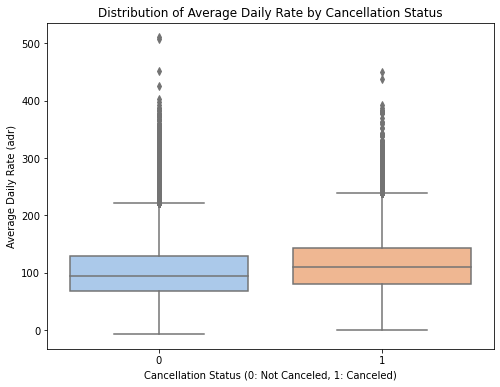

In [156]:
# Plot the boxplot again omitting this record

hotel_adr = hotel[hotel["adr"]<5000]

plt.figure(figsize=(8,6))
sns.boxplot(x = "is_canceled", y="adr", data=hotel_adr, palette="pastel")
plt.title(f'Distribution of Average Daily Rate by Cancellation Status')
plt.xlabel('Cancellation Status (0: Not Canceled, 1: Canceled)')
plt.ylabel("Average Daily Rate (adr)")
plt.show()

**Insights**

- The median lead time for the Canceled bookings is approximately 50 mins while that for non canceled bookings is approx. 100 mins

- The boxplots for the 'stays in weekend nights' feature indicates that bookings with more stay in weekend nights are less likely to be canceled. The non-zero values (outliers in this case) appear more in the non-canceled group.

- The 'stays in week nights' has a similar distribution to that of stay in weekend nights - bookings are less likely to be canceled.

- 'Previous cancellations' - customers with higher previous cancellations are more likely to cancel their bookings as shown by the boxplot, while thos with 'Previous bookings not canceled' are less likely to cancel their bookings.

- Customers who have made booking changes are less likely to cancel their bookings.

- 'Required car parking space' - People who requested for car parking spaces were less likely to cancel their bookings.

- adr (Average Daily Rate) - Hotel rooms with higher average daily rate are more likely to be canceled. They have higher median.

**Temporal Analysis**

In [22]:
# Select the date columns
date_cols = [feature for feature in hotel.columns if "_date_" in feature]
date_cols

['arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month']


--- Analyzing 'arrival_date_year' vs. 'is_canceled' ---


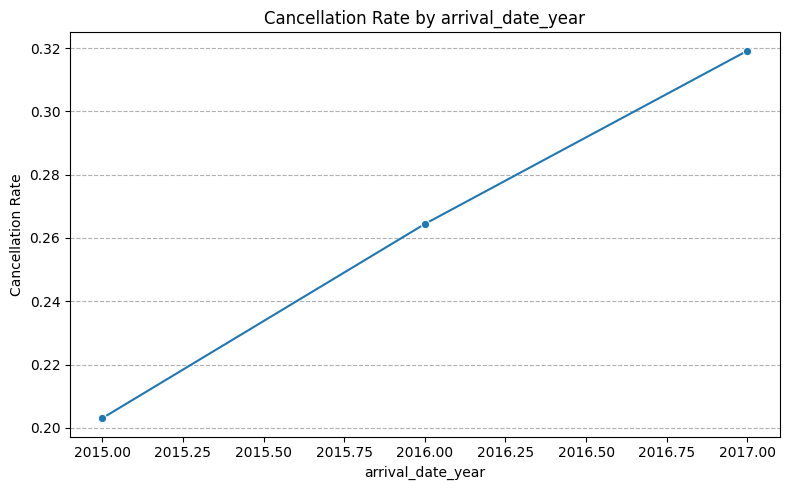

----------------------------------------

--- Analyzing 'arrival_date_month' vs. 'is_canceled' ---


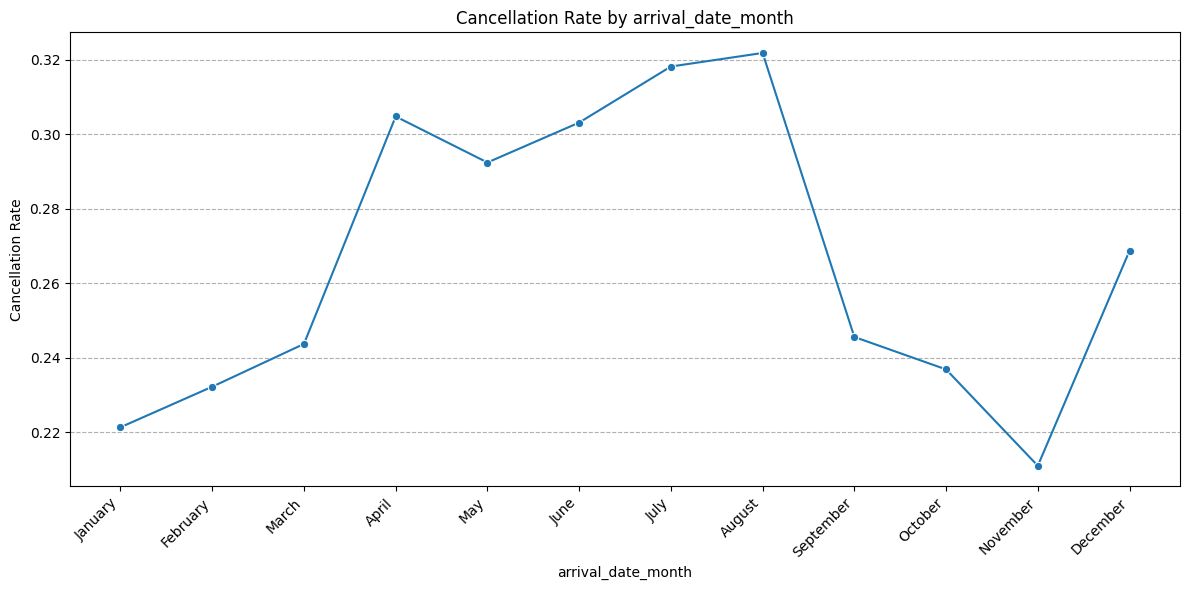

----------------------------------------

--- Analyzing 'arrival_date_week_number' vs. 'is_canceled' ---


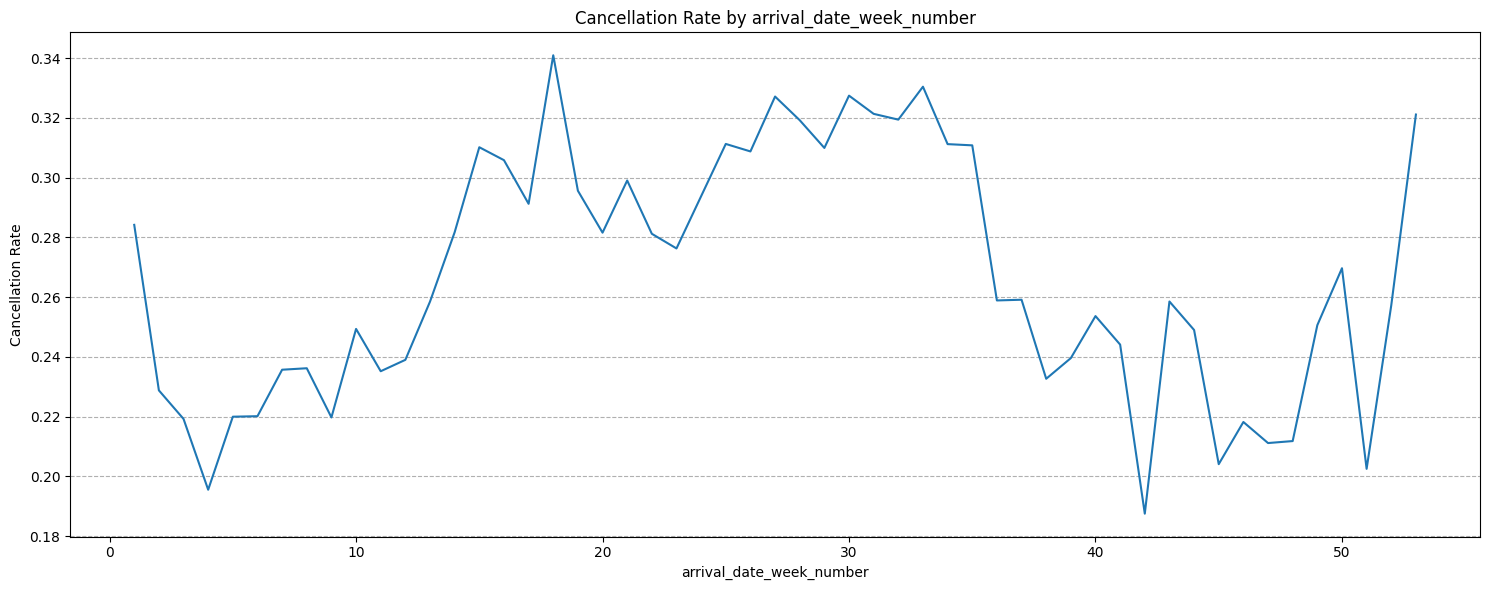

----------------------------------------

--- Analyzing 'arrival_date_day_of_month' vs. 'is_canceled' ---


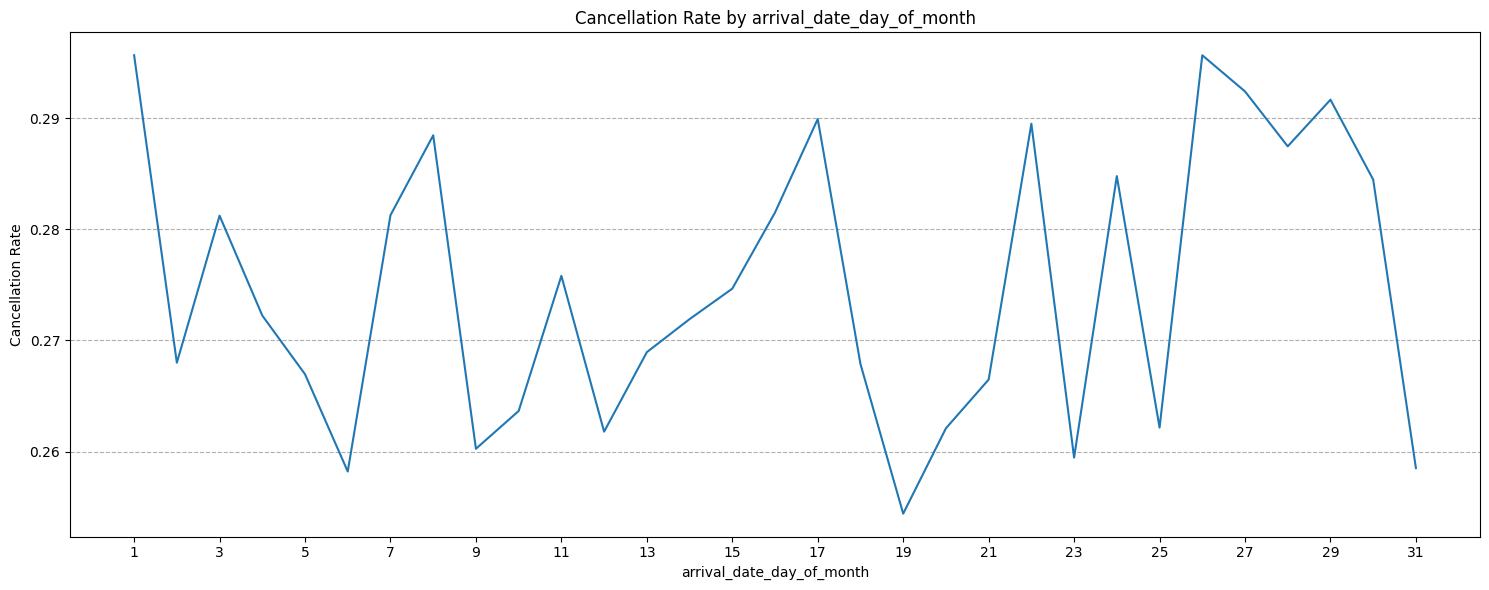

----------------------------------------


In [23]:
# First map month names to numbers for correct sorting in plots

import calendar

month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

hotel['arrival_date_month_num'] = hotel['arrival_date_month'].map(month_map)


# Loop through each date-related column and perform the analysis and visualization
for col in date_cols:
    print(f"\n--- Analyzing '{col}' vs. 'is_canceled' ---")

    # Calculate Cancellation Rate per Date Category - group by column and calculate the mean
    
    cancellation_rate_date = hotel.groupby(col)['is_canceled'].mean()

    # Sort the results appropriately for plotting
    if col == 'arrival_date_month':
        # Sort by the numerical month column
        cancellation_rate_date = hotel.groupby('arrival_date_month')['is_canceled'].mean().loc[calendar.month_name[1:]] # Sort by month names list
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=cancellation_rate_date.index, y=cancellation_rate_date.values, marker='o')
        plt.title(f'Cancellation Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Cancellation Rate')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()

    elif col == 'arrival_date_year':
        # Sort by year
        cancellation_rate_date = cancellation_rate_date.sort_index()
        plt.figure(figsize=(8, 5))
        sns.lineplot(x=cancellation_rate_date.index, y=cancellation_rate_date.values, marker='o')
        plt.title(f'Cancellation Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Cancellation Rate')
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()

    elif col == 'arrival_date_week_number':
        cancellation_rate_date = cancellation_rate_date.sort_index()
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=cancellation_rate_date.index, y=cancellation_rate_date.values) 
        plt.title(f'Cancellation Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Cancellation Rate')
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()

    elif col == 'arrival_date_day_of_month':
        # Sort by day of month
        cancellation_rate_date = cancellation_rate_date.sort_index()
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=cancellation_rate_date.index, y=cancellation_rate_date.values)
        plt.title(f'Cancellation Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Cancellation Rate')
        plt.xticks(np.arange(1, 32, 2))
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()

    print("-" * 40) 

**Insights**
- Cancellation rate has an upward trend across the years. 2015 had a cancellation rate of approximately 0.2, 2016 had a rate of approx. 0.265, while 2017 had the highest with 0.32.

- Cancellation rates show a seasonal pattern. Summer months (August, July, April, June, May) tend to have the highest cancellation rates (above 29%), while late autumn/winter months (November, January, February) have the lowest (below 24%).

- Bookings made for arrival on the first day of the month, and those made in between 27-29th have a high cancellation rate.


--- Analyzing 'arrival_day_of_week' vs. 'is_canceled' ---
arrival_day_of_week
Monday       0.267641
Tuesday      0.243206
Wednesday    0.255274
Thursday     0.277333
Friday       0.305381
Saturday     0.300946
Sunday       0.265848
Name: is_canceled, dtype: float64


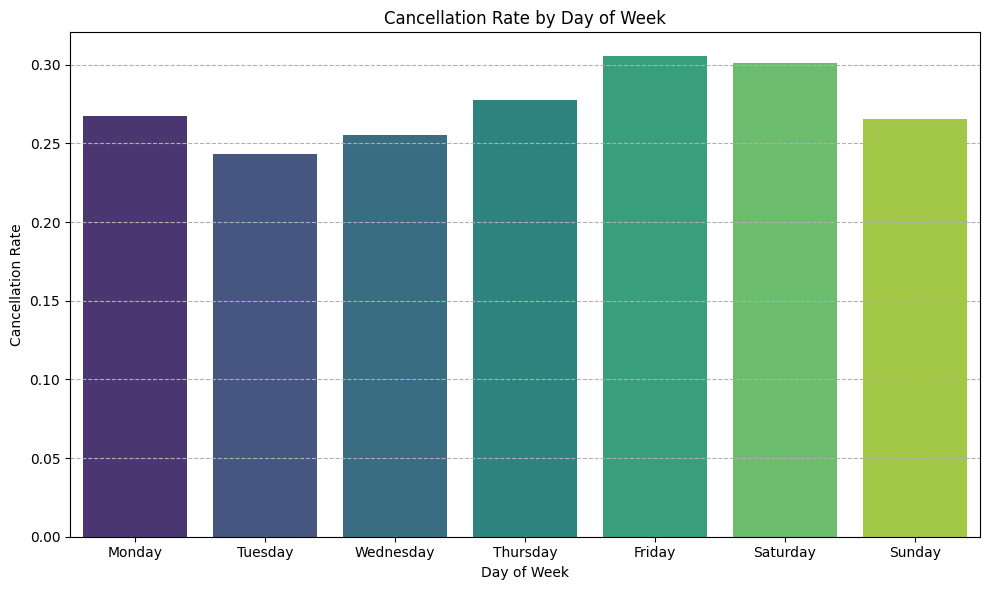

In [24]:
# Create a proper datetime using arrival_year, arrival_date_month_number, and arrival_date_day_of_month
# Use the results to analyze cancelations by day of the week

hotel['arrival_date'] = pd.to_datetime(hotel['arrival_date_year'].astype(str) + '-' +
                                     hotel['arrival_date_month_num'].astype(str) + '-' +
                                       hotel['arrival_date_day_of_month'].astype(str), errors='coerce')

hotel["arrival_date"]


hotel['arrival_day_of_week'] = hotel['arrival_date'].dt.day_name()

if 'arrival_day_of_week' in hotel.columns:
    print("\n--- Analyzing 'arrival_day_of_week' vs. 'is_canceled' ---")
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cancellation_rate_dow = hotel.groupby('arrival_day_of_week')['is_canceled'].mean().reindex(day_order)
    print(cancellation_rate_dow)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=cancellation_rate_dow.index, y=cancellation_rate_dow.values, palette='viridis')
    plt.title('Cancellation Rate by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Cancellation Rate')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

**Insights**
- Thursdays, Fridays, and Saturdays have the highest cancellation rates, while Tuesday has the least

In [25]:
hotel.info()
#hotel.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87370 entries, 0 to 87369
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87370 non-null  object        
 1   is_canceled                     87370 non-null  int64         
 2   lead_time                       87370 non-null  int64         
 3   arrival_date_year               87370 non-null  int64         
 4   arrival_date_month              87370 non-null  object        
 5   arrival_date_week_number        87370 non-null  int64         
 6   arrival_date_day_of_month       87370 non-null  int64         
 7   stays_in_weekend_nights         87370 non-null  int64         
 8   stays_in_week_nights            87370 non-null  int64         
 9   adults                          87370 non-null  int64         
 10  children                        87366 non-null  float64       
 11  ba

In [26]:
# Before proceeding to model building, drop columns that won't be required in the model
hotel.drop(["arrival_date_month_num", "arrival_date"], axis=1, inplace=True)